In [2]:
import pandas as pd 
import numpy as np 
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
df_world = gpd.read_file( "./world_m/world_m.shp")

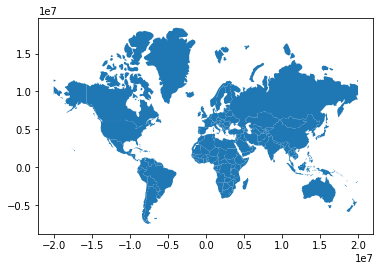

In [4]:
df_world.plot()
plt.show()

In [5]:
df_cities = gpd.read_file( "./cities/cities.shp")

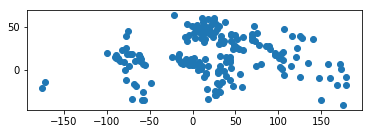

In [6]:
df_cities.plot()
plt.show()

In [7]:
df_world.crs

{'datum': 'WGS84',
 'lat_ts': 0,
 'lon_0': 0,
 'no_defs': True,
 'proj': 'merc',
 'units': 'm',
 'x_0': 0,
 'y_0': 0}

In [8]:
df_cities.crs

{'init': 'epsg:4326'}

In [9]:
df_world = df_world.to_crs({'init': 'epsg:4326'})

In [10]:
df_world.crs

{'init': 'epsg:4326'}

<Figure size 7200x720 with 0 Axes>

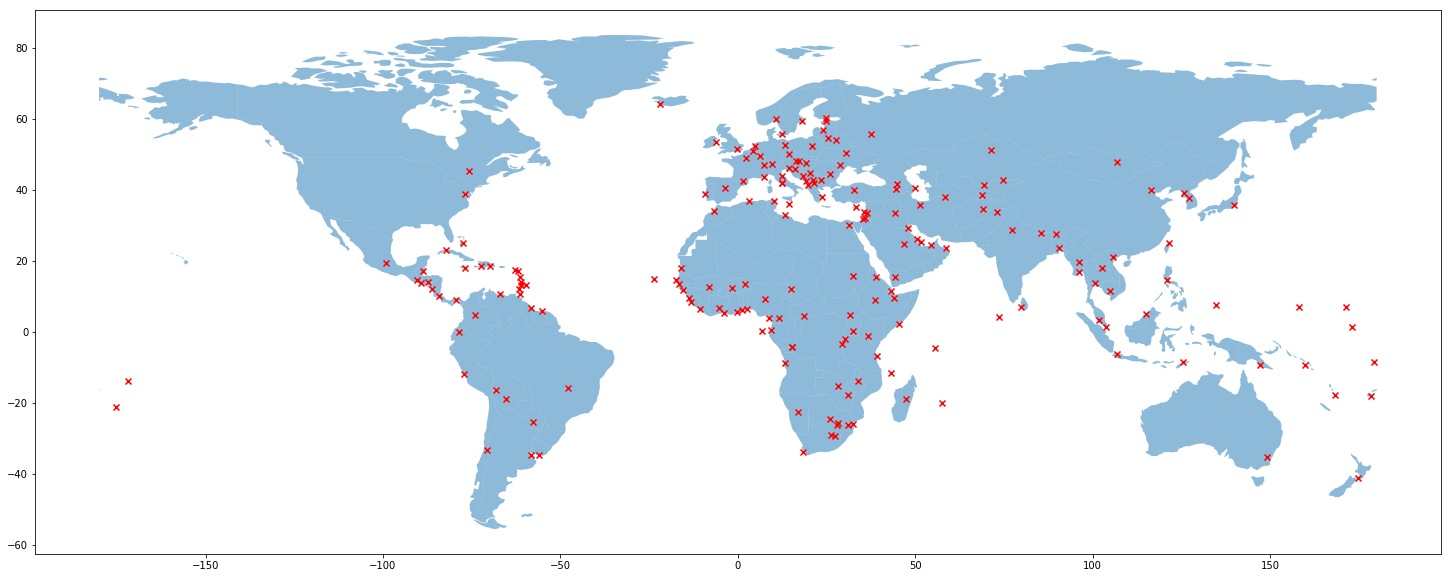

In [11]:


plt.figure(figsize=(100,10))
base = df_world.plot( figsize=(100, 10 )  , alpha = 0.5 ) 
df_cities.plot( ax = base , color = "red" , marker = "x" , figsize = ( 500 , 50 ) )
plt.show()

# Symbol classification


In [12]:
import cv2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
df_labels = pd.read_csv("./HASYv2/hasy-data-labels.csv")

In [14]:
df_labels.head()

path  symbol_id latex  user_id
0  hasy-data/v2-00000.png         31     A       50
1  hasy-data/v2-00001.png         31     A       10
2  hasy-data/v2-00002.png         31     A       43
3  hasy-data/v2-00003.png         31     A       43
4  hasy-data/v2-00004.png         31     A     4435

In [15]:
# sub set:

df_labels = df_labels[ df_labels["symbol_id"] <= 80   ]
df_labels = df_labels[ df_labels["symbol_id"] >= 70   ]

In [16]:
df_labels.describe()

symbol_id        user_id
count  1020.000000    1020.000000
mean     74.179412   12562.312745
std       2.990362   28637.795556
min      70.000000      10.000000
25%      72.000000      28.000000
50%      74.000000    5852.000000
75%      77.000000    8324.000000
max      79.000000  125926.000000

In [17]:
df_labels.shape

(1020, 4)

In [18]:
data = [ ]
labels = [ ]
for p  , l in  zip(df_labels["path"].values , df_labels["symbol_id"].values ):
    #print(p)
    im = cv2.imread( "HASYv2/" + p , cv2.IMREAD_GRAYSCALE   )
    im = im.flatten()
    data.append( im )
    labels.append( l )
    #print( im.shape )

In [19]:
len(data)

1020

In [20]:
len( labels)

1020

In [21]:
data = np.array( data )
labels = np.array( labels )

In [22]:
data.shape

(1020, 1024)

In [23]:
labels.shape

(1020,)

In [24]:
labels = labels - 70 

In [25]:
x_val = data[:100]
y_val = labels[:100]

In [26]:
X_train, X_test, y_train, y_test = train_test_split( data[100:], labels[100:], test_size=0.20, random_state=42)

In [27]:
X_train.shape

(736, 1024)

In [28]:
X_test.shape

(184, 1024)

In [29]:
clf = LogisticRegression( )

clf = clf.fit( X_train , y_train )

In [30]:
mean_accu = clf.score( X_test , y_test )
print( "mean accuracy:{}".format(mean_accu)  )

mean accuracy:0.8641304347826086


In [31]:
y_pred  = clf.predict( x_val )


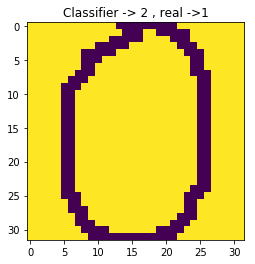

HASYv2/hasy-data/v2-00345.png


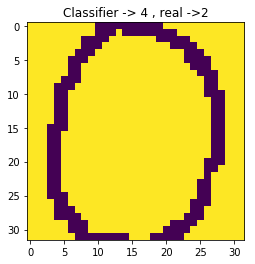

HASYv2/hasy-data/v2-00346.png


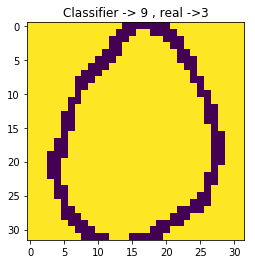

HASYv2/hasy-data/v2-00347.png


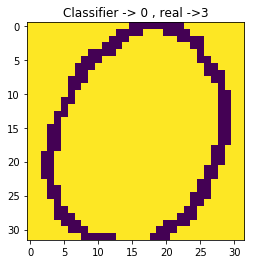

HASYv2/hasy-data/v2-00348.png


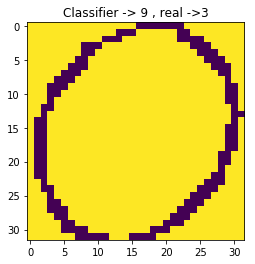

HASYv2/hasy-data/v2-00349.png


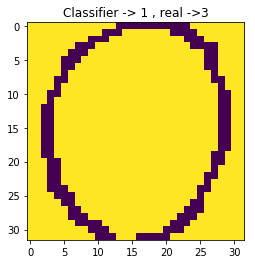

HASYv2/hasy-data/v2-00350.png


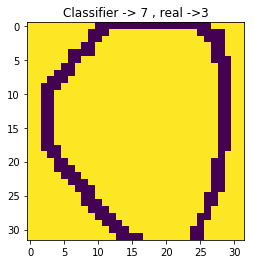

HASYv2/hasy-data/v2-00351.png


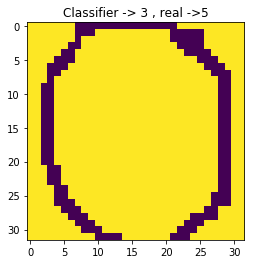

HASYv2/hasy-data/v2-00352.png


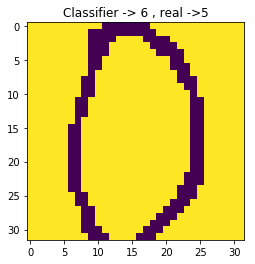

HASYv2/hasy-data/v2-00353.png


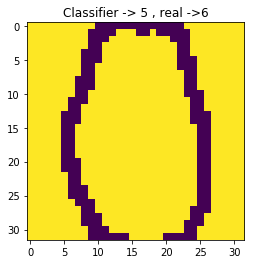

HASYv2/hasy-data/v2-00354.png


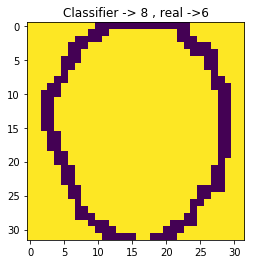

HASYv2/hasy-data/v2-00355.png


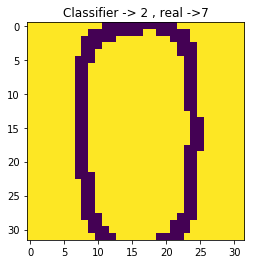

HASYv2/hasy-data/v2-00356.png


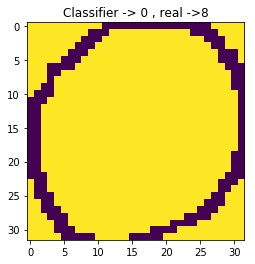

HASYv2/hasy-data/v2-00357.png


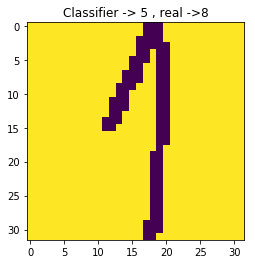

HASYv2/hasy-data/v2-00358.png


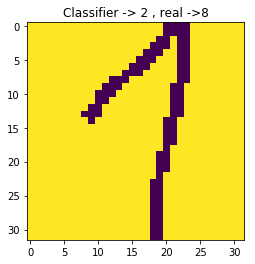

HASYv2/hasy-data/v2-00359.png


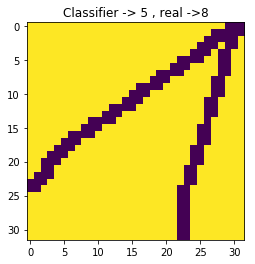

HASYv2/hasy-data/v2-00360.png


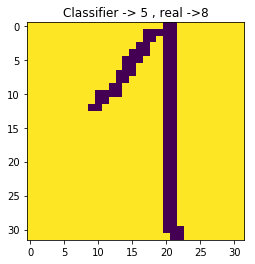

HASYv2/hasy-data/v2-00361.png


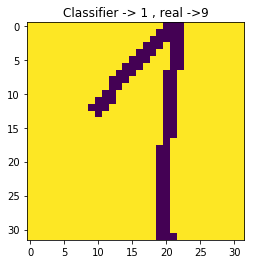

HASYv2/hasy-data/v2-00362.png


In [33]:
i = 0
data_plot = [ ]
for real , pred in zip( y_val , y_pred):
    if real == pred:
        continue
    else:
        # mismatch
        data_path = "HASYv2/" + df_labels.iloc[ i ] ["path"]
        im = cv2.imread( data_path , cv2.IMREAD_GRAYSCALE  )
        plt.imshow( im )
        plt.title( "Classifier -> {} , real ->{}".format( pred , real ) )
        plt.show()
        print(data_path)
        i = i + 1
    